# F21 AA. CW 1
# TASK 5 Topic Modelling

Import

In [46]:
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Input

In [47]:
# Preprocessed data from step 2 which used Stemming
df_reviews_p_s = pd.read_csv('df_reviews_p_s.csv')
df_reviews_p_s.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good receiv product earli seller tastey great ...,103,16,104,24
1,1,5,organ kosher tasti assort premium tea teasan n...,1199,193,799,126
2,2,5,excel glutenfre spaghetti great tast great str...,619,101,527,103
3,3,5,lindt lindt buy multipack misl pictur whole ha...,117,19,84,15
4,4,5,yum bar good love warm definit think great sna...,88,14,76,15


Split into 1 star and 5 star ratings and subsample 30,000 rows for both

1 Star

In [48]:
df_reviews_1Star=df_reviews_p_s[df_reviews_p_s['Score']==1]

In [49]:
df_reviews_1Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
18,18,1,plastic tast first coffe tri got keurig disapp...,219,36,136,28
31,31,1,danger doggi dont buy larg german shepherd cut...,149,27,153,32
49,49,1,ugh fake food want sugar splurg chose shortbre...,180,27,84,13
55,55,1,worst product ever chines never brought produc...,139,23,102,22
56,56,1,enorm ripoff nearli twice expens cost nespress...,89,14,67,11
...,...,...,...,...,...,...,...
426306,426306,1,pleas coffe drinker know good coffe one pass s...,53,9,43,11
426307,426307,1,two leav blah saw chai tea shop tazo chai tea ...,293,55,270,58
426309,426309,1,evang buffalo fruit vegtabl treat would never ...,125,20,107,24
426325,426325,1,great product item near expir receiv item toda...,274,50,200,42


In [50]:
df_reviews_1Star.sample(frac =30000/len(df_reviews_1Star)) 

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
173377,173377,1,slow servic site say paypal accept upon reques...,143,24,101,19
36137,36137,1,disgust obvious old stock broken wrapper torn ...,212,34,149,27
173910,173910,1,dont wast money bought xsmall 12 lb dog dog un...,258,47,198,44
223877,223877,1,expir chip receiv miss vicki varieti pack 30 t...,623,114,539,122
163868,163868,1,extrem bitter dont know might got bad bag stuf...,199,34,120,26
...,...,...,...,...,...,...,...
341236,341236,1,nice waxi ive got believ review havent actual ...,1168,191,923,164
81586,81586,1,tast like dirt purchas contain dairi soy corn ...,171,32,134,22
382135,382135,1,super fast servicenasti candi hrefhttpwwwamazo...,553,90,413,85
185992,185992,1,yuck tea prefer avid tea drinker tea bitter wo...,147,27,140,32


5 Star

In [51]:
df_reviews_5Star=df_reviews_p_s[df_reviews_p_s['Score']==5]

In [52]:
df_reviews_5Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good receiv product earli seller tastey great ...,103,16,104,24
1,1,5,organ kosher tasti assort premium tea teasan n...,1199,193,799,126
2,2,5,excel glutenfre spaghetti great tast great str...,619,101,527,103
3,3,5,lindt lindt buy multipack misl pictur whole ha...,117,19,84,15
4,4,5,yum bar good love warm definit think great sna...,88,14,76,15
...,...,...,...,...,...,...,...
426333,426333,5,yum current favorit tea basic given lipton tea...,84,16,54,10
426334,426334,5,wow grandma work grow southwest refri bean sta...,328,54,232,53
426336,426336,5,antifatigu fantast product im rel new long dis...,1228,215,969,201
426337,426337,5,alway right formula trust brandth flavor blend...,103,16,48,9


In [53]:
df_reviews_5Star=df_reviews_5Star.sample(frac =30000/len(df_reviews_5Star)) 

In [54]:
df_reviews_5Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
73920,73920,5,awesom bread mix love mix make one best irish ...,147,26,116,24
414744,414744,5,wanachi ferri stir fri one sweet sour kung pao...,554,98,388,86
228365,228365,5,dog treat two maltipoo love duck chip reward g...,64,12,79,16
36221,36221,5,best best oat bran cereal none other match har...,511,90,473,95
132823,132823,5,delici caviar excel product prompt deliveri so...,103,16,59,11
...,...,...,...,...,...,...,...
237270,237270,5,mystic chai spice tea realli love tea get hard...,432,82,400,91
202376,202376,5,super order pop tart came within week realli n...,71,13,46,9
231511,231511,5,stash white christma 100 ct tea super exit fin...,409,71,294,60
189505,189505,5,energ wyld pretzel like regular pretzel even g...,144,24,104,20


## TOPIC MODELLING

### a) 1 Star ratings

Vectorize to extract features

In [55]:
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(df_reviews_1Star['Summary_text'])

Use Latent Dirichlet Allocation algorithm to build vocabulary for 10 topics

In [56]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

In [57]:
document_topics = lda.fit_transform(X)

Check shape of model

In [58]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 1000)


Sort and get feature names

In [59]:

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

Display 10 topics 

In [60]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          dog           eat           amazon        coffe         
money         treat         chocol        box           cup           
wast          made          cooki         receiv        kcup          
work          china         chip          packag        bean          
didnt         chew          bar           bag           roast         
review        jerki         realli        item          pod           
make          chicken       love          open          brew          
first         pet           ever          return        bitter        
go            love          salt          arriv         blend         
day           piec          textur        ship          weak          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
smel

Remodel for 100 topics

In [61]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

randomly choose  15 topics to display

In [62]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

Sort and Display topics

In [63]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
minut         tea           dri           year          can           
toy           drink         textur        last          case          
ball          cup           light         favorit       dent          
dog           brew          wet           shipment      damag         
interest      leav          seem          ago           smoke         
30            weak          chewi         ive           open          
apart         loos          mouth         bug           amazon        
last          love          old           month         12            
destroy       bitter        almost        longer        everi         
10            noth          feel          mani          sever         
plastic       time          past          happen        purchas       
hold          box           recommend     purchas       whole         
within

Plot

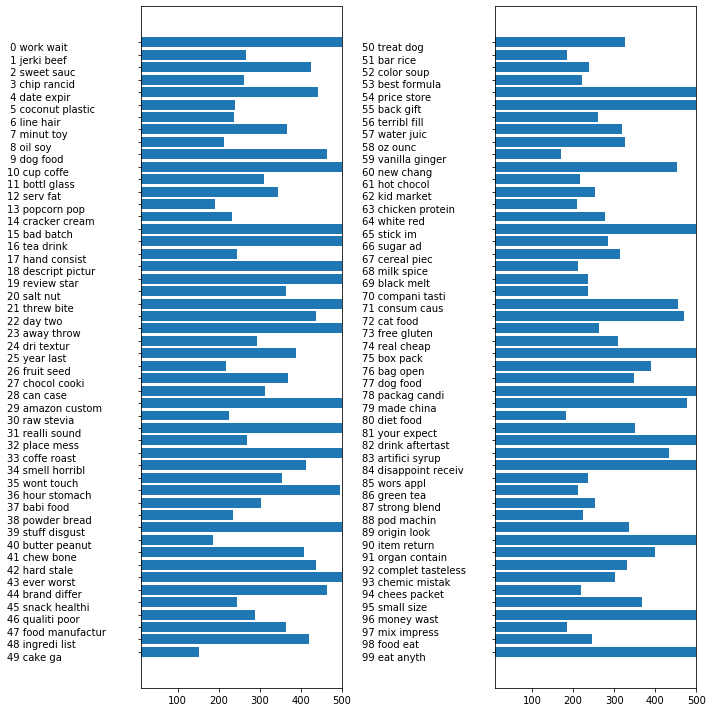

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(10, 500)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

## 2) 5 Star Ratings 

Vectorize to extract features

In [65]:
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(df_reviews_5Star['Summary_text'])

Use Latent Dirichlet Allocation algorithm to build vocabulary for 10 topics

In [66]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

In [67]:
document_topics = lda.fit_transform(X)

Check shape of model

In [68]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 1000)


Sort and get feature names

In [69]:

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

Display 10 topics 

In [70]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
amazon        oil           sugar         work          coffe         
price         butter        milk          day           cup           
store         mix           cereal        time          kcup          
order         peanut        mix           water         blend         
find          coconut       sweet         dont          roast         
local         gluten        powder        take          strong        
ship          free          add           drink         favorit       
purchas       bread         fruit         im            bold          
box           bake          syrup         go            brew          
time          pasta         water         would         dark          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
sauc

Remodel for 100 topics

In [71]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

randomly choose  15 topics to display

In [72]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

Sort and Display topics

In [73]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
tea           order         water         store         spice         
green         arriv         coconut       local         season        
drink         quickli       boil          groceri       meat          
black         everyon       refresh       amazon        grill         
bag           time          better        price         steak         
enjoy         amazon        ad            cheaper       pork          
brew          condit        drink         much          chicken       
wonder        perfect       liter         offer         herb          
stash         would         much          better        everyth       
steep         came          pure          bought        cook          
leaf          well          say           purchas       garlic        
also          definit       recommend     carri         dish          
herbal

plot

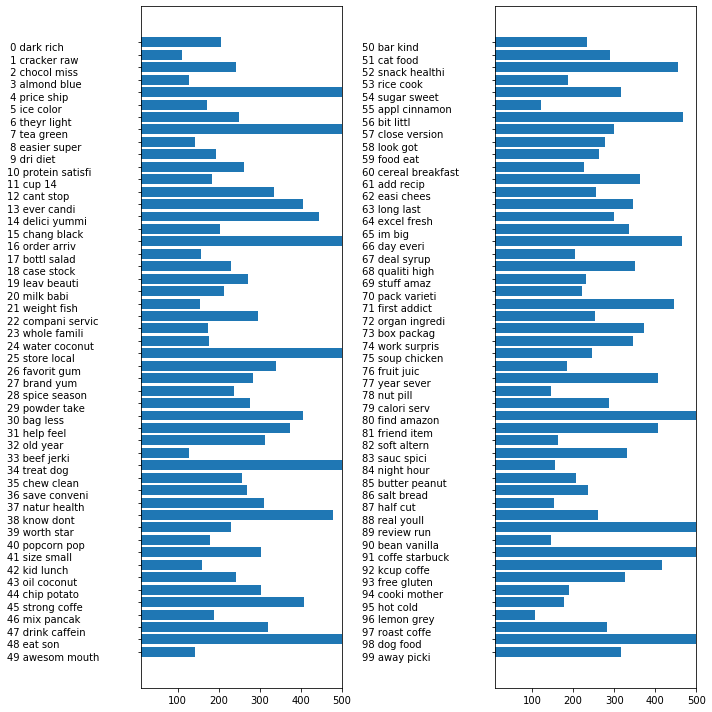

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(10,500)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()